In [8]:
!pip3 install matplotlib

In [9]:
# Imports
from tira.third_party_integrations import ensure_pyterrier_is_loaded, persist_and_normalize_run
from tira.rest_api_client import Client
import pyterrier as pt
import matplotlib.pyplot as plt
import os

In [10]:
# Create a REST client to the TIRA platform for retrieving the pre-indexed data.
ensure_pyterrier_is_loaded()
tira = Client()

In [11]:
# The dataset: the union of the IR Anthology and the ACL Anthology
# This line creates an IRDSDataset object and registers it under the name provided as an argument.
pt_dataset = pt.get_dataset('irds:ir-lab-sose-2024/ir-acl-anthology-20240504-training')


There are multiple query fields available: ('text', 'title', 'query', 'description', 'narrative'). To use with pyterrier, provide variant or modify dataframe to add query column.


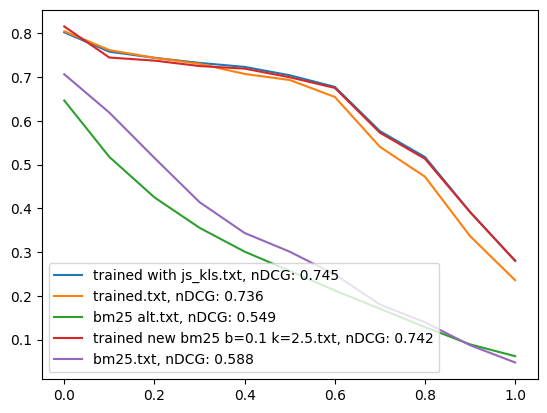

In [11]:
runs_directory = "../runs"
runs = []
for filename in os.listdir(runs_directory):
    runs.append(pt.io.read_results(os.path.join(runs_directory, filename)))

df = pt.Experiment(
    runs,
    pt_dataset.get_topics(),
    pt_dataset.get_qrels(),
    ["iprec_at_recall", "ndcg"],
    os.listdir(runs_directory)
)

for list in df.to_numpy().tolist() :
    plt.plot(
        [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
        list[1:12], 
        label=list[0] + ", nDCG: " + str(list[12])[:5]
    )

plt.legend()
plt.show()